 <br> <font color = black size=8>CQF Lecture One - Exercises </font> 

**The log-Normal random walk**.

$$ dS = \mu S dt + \sigma S dX$$

In class we have looked at Stochastic Differential Equation (SDE) as a popular model for stock price S. 

On the dataset of prices from the Lecture Excel file - or any equity index of your own choice, we test the robustness of the assumption that 

$$ R_i = [\mu\delta t + \sigma\sqrt{\delta t}\phi_i] $$ 

if the drift is a negligible, very small and non robust quantity, $\mu\delta t  \approx 0$.

$$ R_i = \sigma\sqrt{\delta t}\phi_i.$$

$R_i$ represents the returns over timestep $\delta t$, the $\phi_i$ ~ $N(0,1)$ is Standard Normal variable. The tasks below give sufficient detail to be performed on your own - the solution give more information but no separate computation provided.

1. Scaling of $\sigma$ with time, to the size of $\delta t$: compute column(s) of returns (1D, 2D OR 5D but no longer). For example, 5D will be $R_i = \frac{S_{t+5} - S_t}{S_t}$. For each, compute the standard deviation of the role column. Adjust $\sigma_{2D}$ by $1/\sqrt{2}$ and $\sigma_{5D}$ by $1/\sqrt{5}$ - are these comparable to $\sigma_{1D}$?


In [19]:
# Loading packages
import pandas as pd
import numpy as np

# Importing data and calculating return 1D, 2D and 5D
sp500 = pd.read_csv("01-The_Random_Behaviour_of_Assets-SPX.csv")
sp500_returns = pd.DataFrame()
sp500_returns[["1D"]] = np.log(sp500[["Adj Close"]]).diff().fillna(0)
sp500_returns[["2D"]] = np.log(sp500[["Adj Close"]]).diff(2).fillna(0)
sp500_returns[["5D"]] = np.log(sp500[["Adj Close"]]).diff(5).fillna(0)

# Calculating scaled standard deviation
sigma_1D = np.std(sp500_returns[["1D"]])
sigma_2D = np.std(sp500_returns[["2D"]]).divide(np.sqrt(2))
sigma_5D = np.std(sp500_returns[["5D"]]).divide(np.sqrt(5))

print("Standard deviation for 1D return:\n{}".format(sigma_1D))
print("Standard deviation for 2D return:\n{}".format(sigma_2D))
print("Standard deviation for 5D return:\n{}".format(sigma_5D))

Standard deviation for 1D return:
1D    0.01201
dtype: float64
Standard deviation for 2D return:
2D    0.011936
dtype: float64
Standard deviation for 5D return:
5D    0.01178
dtype: float64


2. Re-shuffle the dataset into two non-chronological halves (even / odd observations) and compute $\mu$, $\sigma$  separately for each half (1D returns only). Compare.

In [20]:
# Re-shuffling dataset
shuffled_sp500_returns = sp500_returns[["1D"]].sample(frac=1, random_state=53)
even_half = shuffled_sp500_returns.iloc[::2]
odd_half = shuffled_sp500_returns.iloc[1::2]

# Computing mean and standard deviation separately for each half
mean_even = even_half.mean()
mean_odd = odd_half.mean()
std_even = even_half.std()
std_odd = odd_half.std()

print("Mean for even observations:\n{}".format(mean_even))
print("Mean for odd observations:\n{}".format(mean_odd))
print("Standard deviation for even observations:\n{}".format(std_even))
print("Standard deviation for odd observations:\n{}".format(std_odd))


Mean for even observations:
1D    0.000312
dtype: float64
Mean for odd observations:
1D    0.000145
dtype: float64
Standard deviation for even observations:
1D    0.012167
dtype: float64
Standard deviation for odd observations:
1D    0.011851
dtype: float64


3. Construct Quantile-Quantile plots for 1D and 5D returns. The Q-Q plot assumes Normal distribution on horizontal axis – the better the fit between of the empirical returns to Normal distribution, the more observations will be on the diagonal line.

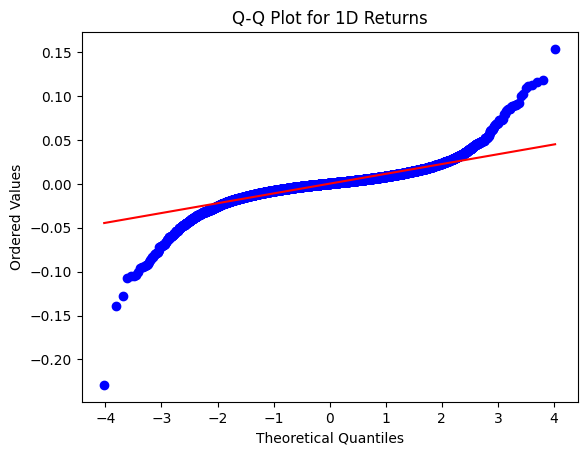

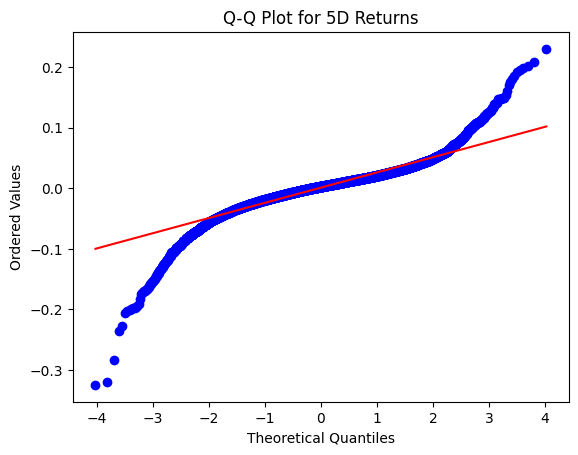

In [21]:
# Loading packages
import matplotlib.pyplot as plt
from scipy import stats

# Constructing Q-Q plot for 1D returns
res_1D = stats.probplot(sp500_returns["1D"], dist="norm", plot=plt)
plt.title("Q-Q Plot for 1D Returns")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Ordered Values")
plt.show()

# Constructing Q-Q plot for 5D returns
res_5D = stats.probplot(sp500_returns["5D"], dist="norm", plot=plt)
plt.title("Q-Q Plot for 5D Returns")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Ordered Values")
plt.show()

4. Construct a histogram over historical returns scaled to z-scores and compare to Normal distribution density. 

    $$ R_i = \frac{\delta S}{S} = \frac{S_{t+1} - S_t}{S_t} = \frac{S_{t+1}}{S_t} - 1 $$ 
    
    This last point is  implemented in Modeling Returns python lab (or alike content). 


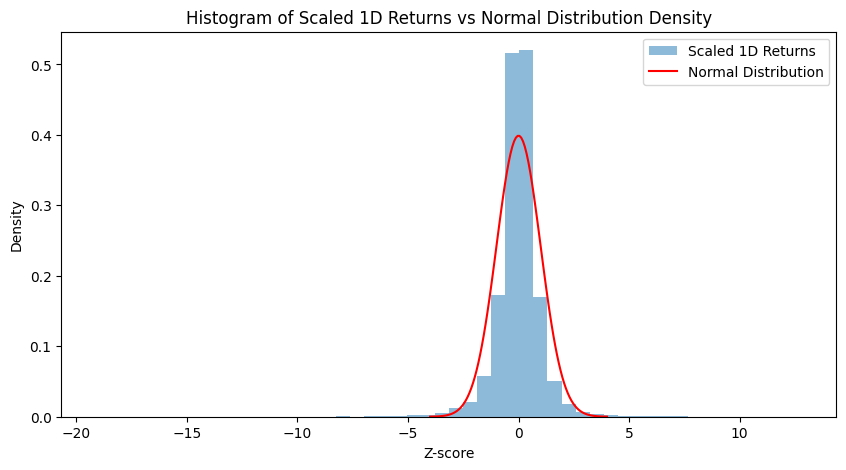

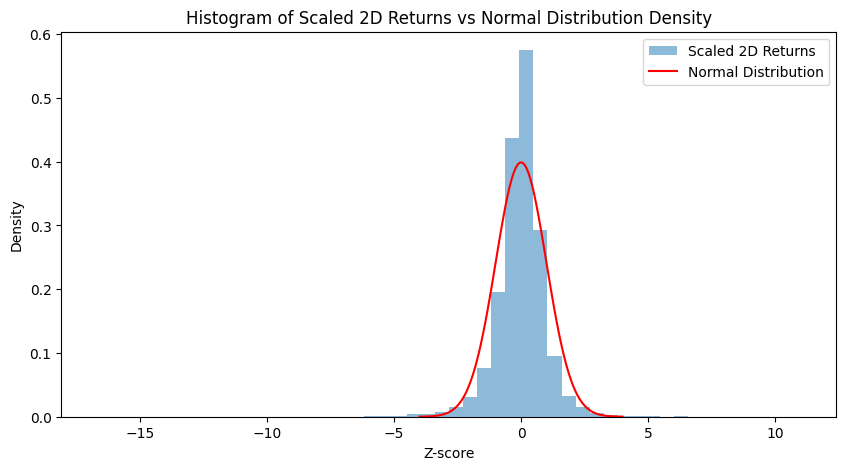

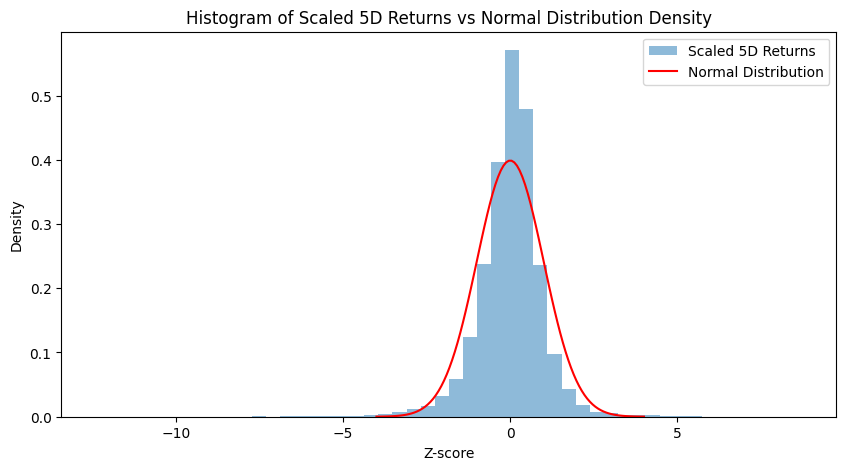

In [22]:
# Scale historical returns to z-scores
z_scores_1D = (sp500_returns["1D"] - sp500_returns["1D"].mean()) / sp500_returns["1D"].std()
z_scores_2D = (sp500_returns["2D"] - sp500_returns["2D"].mean()) / sp500_returns["2D"].std()
z_scores_5D = (sp500_returns["5D"] - sp500_returns["5D"].mean()) / sp500_returns["5D"].std()

# Plotting histogram of scaled 1D returns
plt.figure(figsize=(10, 5))
plt.hist(z_scores_1D, bins=50, density=True, alpha=0.5, label="Scaled 1D Returns")

# Plotting Normal distribution density
x = np.linspace(-4, 4, 100)
y = stats.norm.pdf(x, 0, 1)
plt.plot(x, y, color="red", label="Normal Distribution")

plt.title("Histogram of Scaled 1D Returns vs Normal Distribution Density")
plt.xlabel("Z-score")
plt.ylabel("Density")
plt.legend()
plt.show()

# Plotting histogram of scaled 2D returns
plt.figure(figsize=(10, 5))
plt.hist(z_scores_2D, bins=50, density=True, alpha=0.5, label="Scaled 2D Returns")

# Plotting Normal distribution density
x = np.linspace(-4, 4, 100)
y = stats.norm.pdf(x, 0, 1)
plt.plot(x, y, color="red", label="Normal Distribution")

plt.title("Histogram of Scaled 2D Returns vs Normal Distribution Density")
plt.xlabel("Z-score")
plt.ylabel("Density")
plt.legend()
plt.show()

# Plotting histogram of scaled 5D returns
plt.figure(figsize=(10, 5))
plt.hist(z_scores_5D, bins=50, density=True, alpha=0.5, label="Scaled 5D Returns")

# Plotting Normal distribution density
x = np.linspace(-4, 4, 100)
y = stats.norm.pdf(x, 0, 1)
plt.plot(x, y, color="red", label="Normal Distribution")

plt.title("Histogram of Scaled 5D Returns vs Normal Distribution Density")
plt.xlabel("Z-score")
plt.ylabel("Density")
plt.legend()
plt.show()


**The Q-Q plot.**

The plot is straightforward to build from the first principles in Excel, Python. There are ready functions, that can go as advanced as qqplot from [statsmodels.api](https://www.statsmodels.org/stable/api.html) library in Python. However, going through the principles below you will gain further understanding of what the Q-Q plots signals.

Organize the data in columns that match Historic, Scaled and Standard returns. Historic stands for the actual or empirical S&P 500 return (our data and historic period, you can use any equity index). Scaled is the normalized return (also called z-score).

Standard refers the Normal Percentile that corresponds to the cumulative probability given by $i/N_{obs}$. It the value on axis $X$ that cuts the requisite probability under the bell of Normal density *pdf* or the axis $Y$ result of Normal cumulative density *cdf*.

| Historic  | Scaled    | i | i/N   | Standard |
|-----------|-----------|---|-------|----------|
| -0.22900  | -21.20462 | 1 | 0.00009 | -3.74534 |
| -0.09470  | -8.78146  | 2 | 0.00018 | -3.56758 |
| -0.09354  | -8.67429  | 3 | 0.00027 | -3.45987 |
| -0.09219  | -8.54970  | 4 | 0.00036 | -3.38162 |
| -0.08642  | -8.01584  | 5 | 0.00045 | -3.31983 |
| -0.07922  | -7.35036  | 6 | 0.00054 | -3.26858 |
| .         | .         | . | .     | .        |
| Table 1: Inputs for a Q-Q plot. |


1. Scale historic log-returns $R_t$ to $Z_t = \frac{r_t - \mu}{\sigma}$. Why we use log and not simple returns here is explained in Solutions. Notice our original SDE is continuous-time model.

2.  Sort the scaled returns in the ascending order and create an index column $i = 1, ..., N$.

3. The cumulative density – percentage of observations below this – will be simply $i/N$.

4. The standardised percentile is obtained with the inverse Normal CDF $\Phi^{-1}(i/N)$. Each observation adds’ density (probability mass) of $1/N$.

Plot the scaled returns (Z-scores) from Step 1 against the Normal percentiles from Step 4. For the perfectly Normal log-returns the Q-Q plot would be a straight line.